In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt


In [3]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
df = read_csv(path, header=None)

In [4]:
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
X, y = df.values[:, :-1], df.values[:, -1]

In [6]:
X = X.astype('float32')

In [7]:
y = LabelEncoder().fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
n_features = X.shape[1]

In [19]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

In [20]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [22]:
weights_dict = {}

In [23]:
callback = tf.keras.callbacks.LambdaCallback( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

In [24]:
model_weight = []
weight_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda batch, logs: model_weight.append(
        frobenius_norm(model_2.trainable_weights).numpy()))

In [25]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=2, validation_data=(X_test,y_test), callbacks=[callback])

Train on 919 samples, validate on 453 samples
Epoch 1/30
919/919 - 1s - loss: 2.0461 - acc: 0.4799 - f1_m: 0.4862 - precision_m: 0.4442 - recall_m: 0.5575 - val_loss: 1.6101 - val_acc: 0.5143 - val_f1_m: 0.4934 - val_precision_m: 0.4425 - val_recall_m: 0.5955
Epoch 2/30
919/919 - 0s - loss: 1.7028 - acc: 0.4886 - f1_m: 0.4906 - precision_m: 0.4472 - recall_m: 0.5571 - val_loss: 1.3501 - val_acc: 0.5320 - val_f1_m: 0.5053 - val_precision_m: 0.4605 - val_recall_m: 0.6010
Epoch 3/30
919/919 - 0s - loss: 1.4074 - acc: 0.5038 - f1_m: 0.5109 - precision_m: 0.4660 - recall_m: 0.5847 - val_loss: 1.1246 - val_acc: 0.5408 - val_f1_m: 0.4808 - val_precision_m: 0.4480 - val_recall_m: 0.5427
Epoch 4/30
919/919 - 0s - loss: 1.1595 - acc: 0.5245 - f1_m: 0.5215 - precision_m: 0.4748 - recall_m: 0.6016 - val_loss: 0.9447 - val_acc: 0.5894 - val_f1_m: 0.5227 - val_precision_m: 0.4891 - val_recall_m: 0.5818
Epoch 5/30
919/919 - 0s - loss: 0.9634 - acc: 0.6028 - f1_m: 0.5758 - precision_m: 0.5521 - recall

In [26]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

In [27]:
print("F1 Score  = ",f1_score)
print("Precision = ",precision)
print("Recall    = ", recall)

F1 Score  =  0.923865
Precision =  0.924127
Recall    =  0.92426896


dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


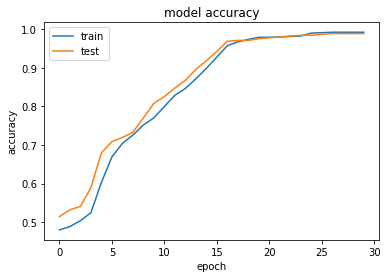

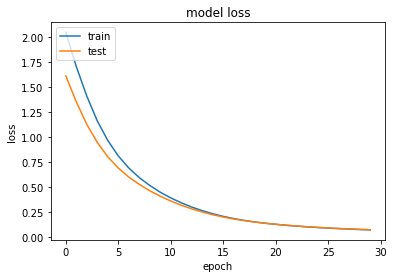

In [28]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()